# Project Code : PRCL-0019
# Business Case:
### Improving Lead Quality with Machine Learning at FicZon Inc

# Project Goal:
#### 1. Data exploration insights - Sales effectiveness.
#### 2. ML model to predict the Lead Category (High Potential, Low Potential)

# Importing Libraries

In [3]:
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
from urllib.parse import quote
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

# Loading dataset

In [5]:
!pip install pymysql

In [6]:
# Database details
raw_username='dm_team2'
raw_password='DM!$Team&27@9!20!'
host='18.136.157.135'
port='3306'
database='project_sales'
table_name='data'

# Encode the username and password to avoid breaking the URL
username=quote(raw_username)
password=quote(raw_password)

# Create connection string
connection_str=f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}"

# Create SQLAlchemy engine
engine=create_engine(connection_str)

# Load data into pandas DataFrame
data = pd.read_sql_table(table_name,engine)

# Converting the file formate to csv
data.to_csv('project_sales.csv',index=False)

In [7]:
data=pd.read_csv('project_sales.csv')
data

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9.0,Call,NaN,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15.0,Call,NaN,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5.0,Live Chat-Direct,NaN,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21.0,CRM form,NaN,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


# Domain Analysis
1. **Created** : Lead creation timestamp or date
2. **Product_ID** : ID of the product of interest
3. **Source** : Lead generation source (e.g. Web, Ads)
4. **Mobile** : Mobile number (some missing)
5. **EMAIL** : Email address
6. **Sales_Agent** : Assigned sales agent
7. **Location** : Geographic location of lead
8. **Delivery_Mode** : Preffrerd delivery mode (e.g. Online)
9. **Status** : Lead status or quality (target variable)

# Basic Checks

In [10]:
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open


In [11]:
data.tail()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
7417,28-04-2018 09:45,9.0,Call,NaN,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15.0,Call,NaN,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5.0,Live Chat-Direct,NaN,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21.0,CRM form,NaN,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry
7421,28-04-2018 07:54,25.0,Website,NaN,cXXXXXXX@gmail.com,Sales-Agent-3,Chennai,Mode-1,CONVERTED


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Created        7422 non-null   object 
 1   Product_ID     7364 non-null   float64
 2   Source         7405 non-null   object 
 3   Mobile         5612 non-null   object 
 4   EMAIL          7422 non-null   object 
 5   Sales_Agent    7399 non-null   object 
 6   Location       7364 non-null   object 
 7   Delivery_Mode  7422 non-null   object 
 8   Status         7422 non-null   object 
dtypes: float64(1), object(8)
memory usage: 522.0+ KB


In [13]:
data.columns

Index(['Created', 'Product_ID', 'Source', 'Mobile', 'EMAIL', 'Sales_Agent',
       'Location', 'Delivery_Mode', 'Status'],
      dtype='object')

In [14]:
data['Status'].unique()

array(['Open', 'Potential', 'In Progress Positive', 'Not Responding',
       'Just Enquiry', 'Junk Lead', 'CONVERTED', 'In Progress Negative',
       'LOST', 'Long Term', 'converted'], dtype=object)

In [15]:
data.describe()

,Product_ID
count,7364.000000
mean,15.947311
std,6.072937
min,0.000000
25%,12.000000
50%,18.000000
75%,19.000000
max,28.000000


In [16]:
data.describe(include='O')

,Created,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
count,7422,7405,5612,7422,7399,7364,7422,7422
unique,6752,25,486,883,12,17,5,11
top,26-09-2018 11:30,Call,XXXXXXX,#VALUE!,Sales-Agent-4,Other Locations,Mode-5,Junk Lead
freq,4,2547,222,1701,1500,2500,2975,1536


# Exploratory Data Analysis (EDA)

In [18]:
data

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9.0,Call,NaN,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15.0,Call,NaN,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5.0,Live Chat-Direct,NaN,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21.0,CRM form,NaN,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


In [19]:
# Installation

!pip install sweetviz

In [20]:
import sweetviz as sv

report = sv.analyze(data)
report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [21]:
data_new = data.drop(['Created','Mobile','EMAIL'], axis = 1)

In [22]:
data_new

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,NaN,Website,Sales-Agent-11,NaN,Mode-5,Open
1,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
2,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
3,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
4,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
...,...,...,...,...,...,...
7417,9.0,Call,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,15.0,Call,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,5.0,Live Chat-Direct,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,21.0,CRM form,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


 #### Dropping Missing Data

In [24]:
data_new.dropna(inplace = True)

In [25]:
data_new.shape

(7328, 6)

In [26]:
data_new

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
18,9.0,Live Chat-Google Organic,Sales-Agent-3,Bangalore,Mode-1,Potential
19,19.0,Call,Sales-Agent-4,Other Locations,Mode-5,Potential
24,18.0,Website,Sales-Agent-11,Trivandrum,Mode-1,Potential
25,15.0,Website,Sales-Agent-7,Hyderabad,Mode-1,Not Responding
26,18.0,Call,Sales-Agent-7,Bangalore,Mode-1,In Progress Positive
...,...,...,...,...,...,...
7417,9.0,Call,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,15.0,Call,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,5.0,Live Chat-Direct,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,21.0,CRM form,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


#### Categorizing the Data set
We can categorize Product_ID, Source, Location and Status column.

#### 1. Categorizing Product_ID

In [29]:
np.sort(data_new.Product_ID.unique().astype(int))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])

In [30]:
product_id_counts = data_new['Product_ID'].value_counts()

# Display the counts

print(product_id_counts)

Product_ID
18.0    1706
15.0    1501
19.0    1188
9.0      990
27.0     737
5.0      484
10.0     168
1.0      104
20.0     101
25.0      90
21.0      65
2.0       38
12.0      36
26.0      31
14.0      27
11.0      12
22.0       8
3.0        7
6.0        7
8.0        6
17.0       6
13.0       4
16.0       3
24.0       2
23.0       2
0.0        2
28.0       1
7.0        1
4.0        1
Name: count, dtype: int64


##### Finding Percentile for each value

In [32]:
from scipy.stats import percentileofscore

def calculate_percentile(x):
    return percentileofscore(product_id_counts, x, kind = 'rank')

percentile = product_id_counts.apply(calculate_percentile)

print(percentile)

Product_ID
18.0    100.000000
15.0     96.551724
19.0     93.103448
9.0      89.655172
27.0     86.206897
5.0      82.758621
10.0     79.310345
1.0      75.862069
20.0     72.413793
25.0     68.965517
21.0     65.517241
2.0      62.068966
12.0     58.620690
26.0     55.172414
14.0     51.724138
11.0     48.275862
22.0     44.827586
3.0      39.655172
6.0      39.655172
8.0      32.758621
17.0     32.758621
13.0     27.586207
16.0     24.137931
24.0     17.241379
23.0     17.241379
0.0      17.241379
28.0      6.896552
7.0       6.896552
4.0       6.896552
Name: count, dtype: float64


##### Column 'Product_ID' to be categorized as Less Sold Product and More Sold Product based on percentage of  numbers sold

In [34]:
data_new.Product_ID.replace(['4', '7', '28', '0', '23', '24', '16', '13', '17', '8', '6', '3', '22', '11'], 'Less Sold Product', inplace = True)

data_new.Product_ID.replace(['14', '26', '12', '2', '21', '25', '20', '1', '10', '5', '27', '9', '19', '15', '18'], 
                            'More Sold Product', inplace = True)

#### 2. Categorizing Source

##### Getting the unique for Source

In [37]:
data_new.Source.unique()

array(['Live Chat-Google Organic', 'Call', 'Website', 'Live Chat-Direct',
       'By Recommendation', 'Customer Referral', 'Live Chat-Blog',
       'Live Chat -PPC', 'Live Chat-Google Ads',
       'Live Chat-Adwords Remarketing', 'E-Mail Message',
       'Existing Client', 'Live Chat-CPC', 'Existing Customer',
       'Live Chat-Quora', 'US Website', 'Just Dial', 'Campaign', 'Other',
       'E-mail Campaign', 'CRM form', 'SMS Campaign', 'Personal Contact',
       'Live Chat-Youtube', 'Live Chat-Justdial'], dtype=object)

In [38]:
source_counts = data_new['Source'].value_counts()

# Display the counts

print(source_counts)

Source
Call                             2536
Live Chat-Direct                 1827
Website                          1551
Live Chat-Google Organic          269
Live Chat -PPC                    249
Live Chat-Blog                    237
Customer Referral                 180
US Website                        129
Just Dial                          56
Existing Client                    51
Personal Contact                   50
Live Chat-CPC                      49
By Recommendation                  32
Existing Customer                  22
CRM form                           22
Live Chat-Google Ads               20
Campaign                           19
E-mail Campaign                    12
Live Chat-Adwords Remarketing       7
Live Chat-Quora                     2
Other                               2
SMS Campaign                        2
Live Chat-Youtube                   2
E-Mail Message                      1
Live Chat-Justdial                  1
Name: count, dtype: int64


In [39]:
data_new.Source.replace(['Live Chat-Direct',
                         'Live Chat-Google Organic',
                         'Live Chat -PPC',
                         'Live Chat-Blog',
                         'Live Chat-Quora',
                         'Live Chat-CPC',
                         'Live Chat-Google Ads',
                         'Live Chat-Adwords Remarketing',
                         'Live Chat-Youtube',
                         'Live Chat-Justdial'], 'Live Chat', inplace = True)

data_new.Source.replace(['Existing Client',
                         'CRM form',
                         'Personal Contact'], 'Existing Customer', inplace = True)

data_new.Source.replace(['By Recommendation'], 'Customer Referral', inplace = True)

data_new.Source.replace(['US Website',
                         'Just Dial'], 'Website', inplace = True)

data_new.Source.replace(['E-mail Campaign',
                         'SMS Campaign',
                         'E-Mail Message',
                         'Other'], 'Campaign', inplace = True)

##### Getting unique values for Source after categorization

In [41]:
data_new.Source.unique()

array(['Live Chat', 'Call', 'Website', 'Customer Referral', 'Campaign',
       'Existing Customer'], dtype=object)

#### 3. Categorizing Location

##### Getting the unique for Location

In [44]:
data_new.Location.unique()

array(['Bangalore', 'Other Locations', 'Trivandrum', 'Hyderabad',
       'Chennai', 'UK', 'USA', 'Delhi', 'UAE', 'Mumbai', 'Kolkata',
       'Singapore', 'Pune', 'AUSTRALIA', 'EUROPE', 'Malaysia', 'Howrah'],
      dtype=object)

In [45]:
location_counts = data_new['Location'].value_counts()

# Display the counts

print(location_counts)

Location
Other Locations    2481
Bangalore          2079
Chennai             907
Hyderabad           527
Delhi               470
Mumbai              399
Pune                139
UAE                  77
Trivandrum           58
Kolkata              55
USA                  45
UK                   41
AUSTRALIA            25
Singapore            17
Malaysia              4
EUROPE                3
Howrah                1
Name: count, dtype: int64


In [46]:
data_new.Location.replace(['UAE',
                           'USA',
                           'UK',
                           'AUSTRALIA',
                           'Singapore',
                           'Malaysia',
                           'EUROPE'],'Overseas', inplace = True)

data_new.Location.replace(['Bangalore',
                           'Chennai',
                           'Hyderabad',
                           'Delhi',
                           'Mumbai',
                           'Pune',
                           'Trivandrum',
                           'Kolkata',
                           'Howrah'],'India', inplace = True)

data_new.Location.replace(['Other Locations'],'Others', inplace = True)

#### 4. Categorizing Status

In [48]:
data_new.Status.unique()

array(['Potential', 'Not Responding', 'In Progress Positive',
       'Just Enquiry', 'Junk Lead', 'CONVERTED', 'In Progress Negative',
       'Open', 'LOST', 'Long Term', 'converted'], dtype=object)

In [49]:
status_counts = data_new['Status'].value_counts()

# Display the counts

print(status_counts)

Status
Junk Lead               1532
Not Responding          1119
CONVERTED                834
Just Enquiry             751
Potential                705
Long Term                644
In Progress Positive     642
In Progress Negative     625
LOST                     439
Open                      19
converted                 18
Name: count, dtype: int64


##### Column 'Status' to be categorized as High Potential and Low Potential

In [51]:
data_new.Status.replace(['CONVERTED',
                     'In Progress Positive',
                     'Potential',
                     'Long Term',
                     'Open'], 'High Potential', inplace = True)

data_new.Status.replace(['LOST','converted',
                     'In Progress Negative', 'Not Responding',
                     'Junk Lead',
                     'Just Enquiry'], 'Low Potential', inplace = True)

##### Plotting the Categorized labels for each column

In [53]:
data_new

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
18,9.0,Live Chat,Sales-Agent-3,India,Mode-1,High Potential
19,19.0,Call,Sales-Agent-4,Others,Mode-5,High Potential
24,18.0,Website,Sales-Agent-11,India,Mode-1,High Potential
25,15.0,Website,Sales-Agent-7,India,Mode-1,Low Potential
26,18.0,Call,Sales-Agent-7,India,Mode-1,High Potential
...,...,...,...,...,...,...
7417,9.0,Call,Sales-Agent-6,India,Mode-4,Low Potential
7418,15.0,Call,Sales-Agent-12,Others,Mode-5,Low Potential
7419,5.0,Live Chat,Sales-Agent-11,India,Mode-1,Low Potential
7420,21.0,Existing Customer,Sales-Agent-4,Others,Mode-1,Low Potential


##### Count Plot for each Features

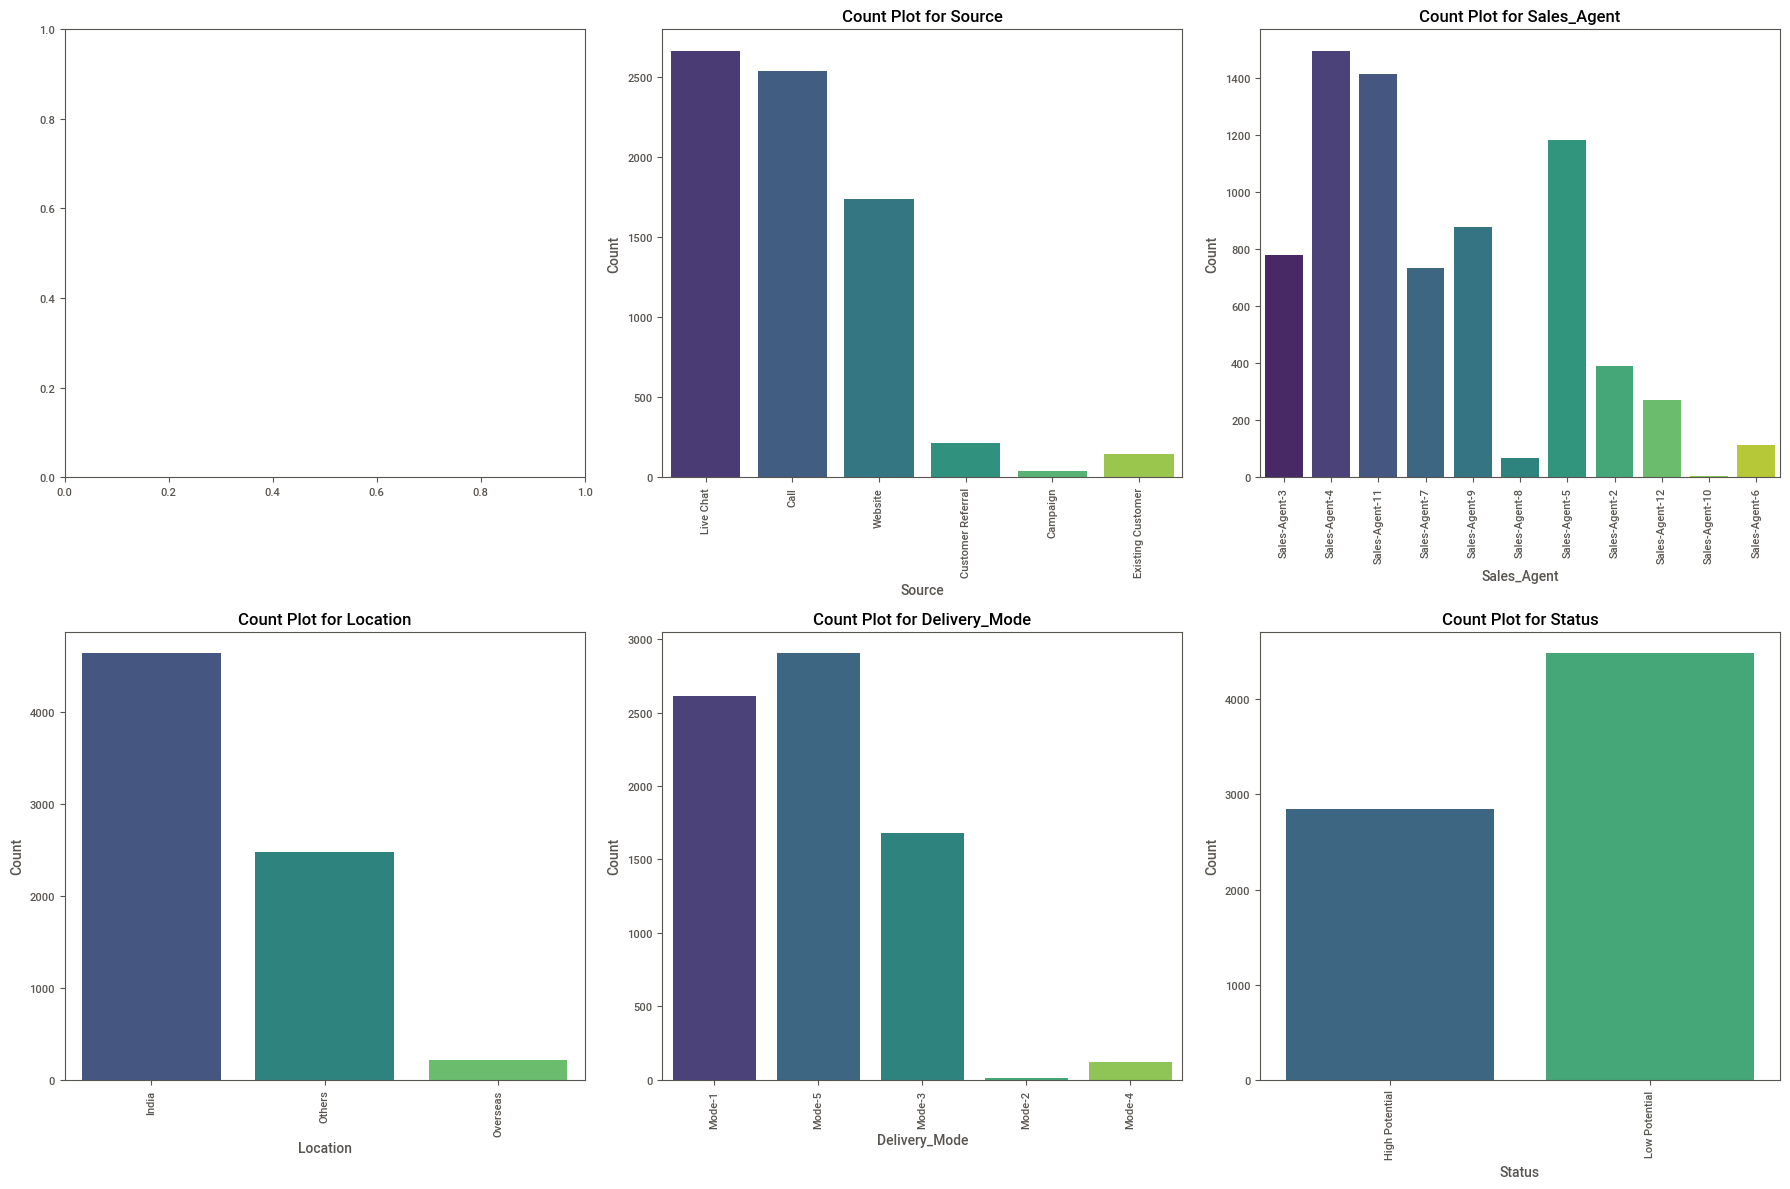

In [55]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (18, 12))

# Convert 2D array to 1D array

axes = axes.flatten()

for i, feature in enumerate(data_new.columns):
    if data_new[feature].dtype == 'O': 
        sns.countplot(data = data_new, x = feature, palette = 'viridis', ax = axes[i])
        axes[i].set_title(f'Count Plot for {feature}')
        axes[i].set_xlabel(f'{feature}')
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis = 'x', rotation = 90)


plt.tight_layout()

plt.show()

**Observations:**
    
1. **More Sold Product** are comparatively much **higher** in number than the **Less Sold Product**.

2. Source of communication through **Live Chat**, **Call** and **Website** are frequent than other sources.

3. **Sales Agent-4, -5 and -11** are among the **top 3** list of Agents who successfully sold the products.

4. **India** is the top location from where the order was made for the products as compared to other locations.

5. The most common mode to deliver the products is **Delivery Mode-5**.

6. Most of the Status for the Product is in **Low Potential category** (i.e., LOST, In Progress Negative, Not Responding, Junk Lead, Just Enquiry).

##### Pie Chart for Each Features

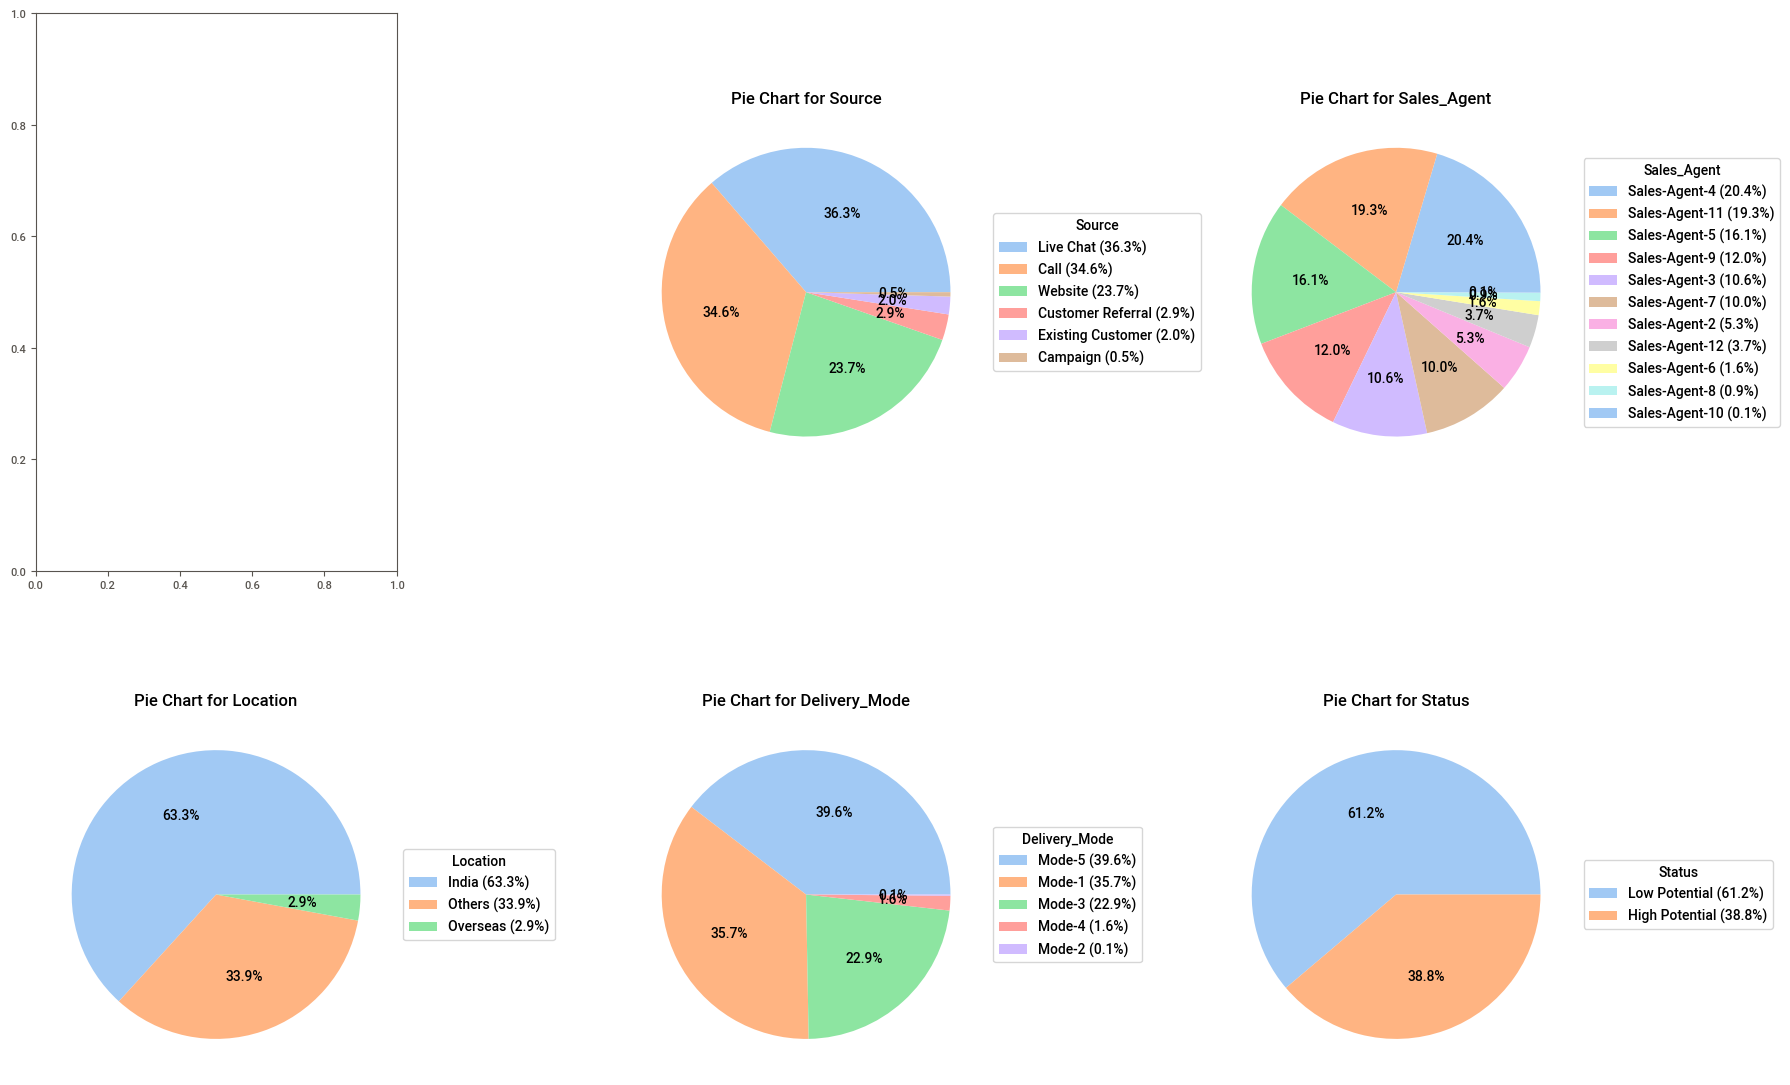

In [58]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

# Use Seaborn's "pastel" color palette
pastel_palette = sns.color_palette('pastel')

for i, feature in enumerate(data_new.columns):
    if data_new[feature].dtype == 'O':
        category_counts = data_new[feature].value_counts()

        # Calculate percentages for the legend
        percentages = 100 * category_counts / category_counts.sum()

        # Use ax.pie and ax.legend with pastel colors
        ax = axes[i]
        ax.pie(category_counts, labels = None, autopct = lambda p: f'{p:.1f}%', colors = pastel_palette)
        ax.set_title(f'Pie Chart for {feature}')

        # Display the custom legend with percentages
        legend_labels = [f'{label} ({percentage:.1f}%)' for label, percentage in zip(category_counts.index, percentages)]
        ax.legend(legend_labels, title = feature, loc = 'center left', bbox_to_anchor = (1, 0.5))

plt.subplots_adjust(wspace = 0.5, hspace = 0.5) 
plt.tight_layout()
plt.show()

**Observations:**
    
1. Almost 99.2% of the product are under **More Sold Product** category and only 0.8% falls in Less Sold Category.

2. Source of communication through **Live Chat** which is almost 36.3% and **Call** with 34.5% are the most common way to connect with the company.

3. **Sales Agent-4 (20.4%), Sales Aget-11 (19.3) and Sales Agent-5 (16.1%)** are most successful in selling the products.

4. **India** with 63.3% is the place where FicZon is having a good business.

5. The most common mode to deliver the products is **Delivery Mode-5 with 39.6% of total Mode of Delivery**.

6. Almost 60.9% of the productis falling in **Low Potential category** status.

### Bivariate Analysis

##### Plotting graph to show how each 'Feature' affects the 'Status'

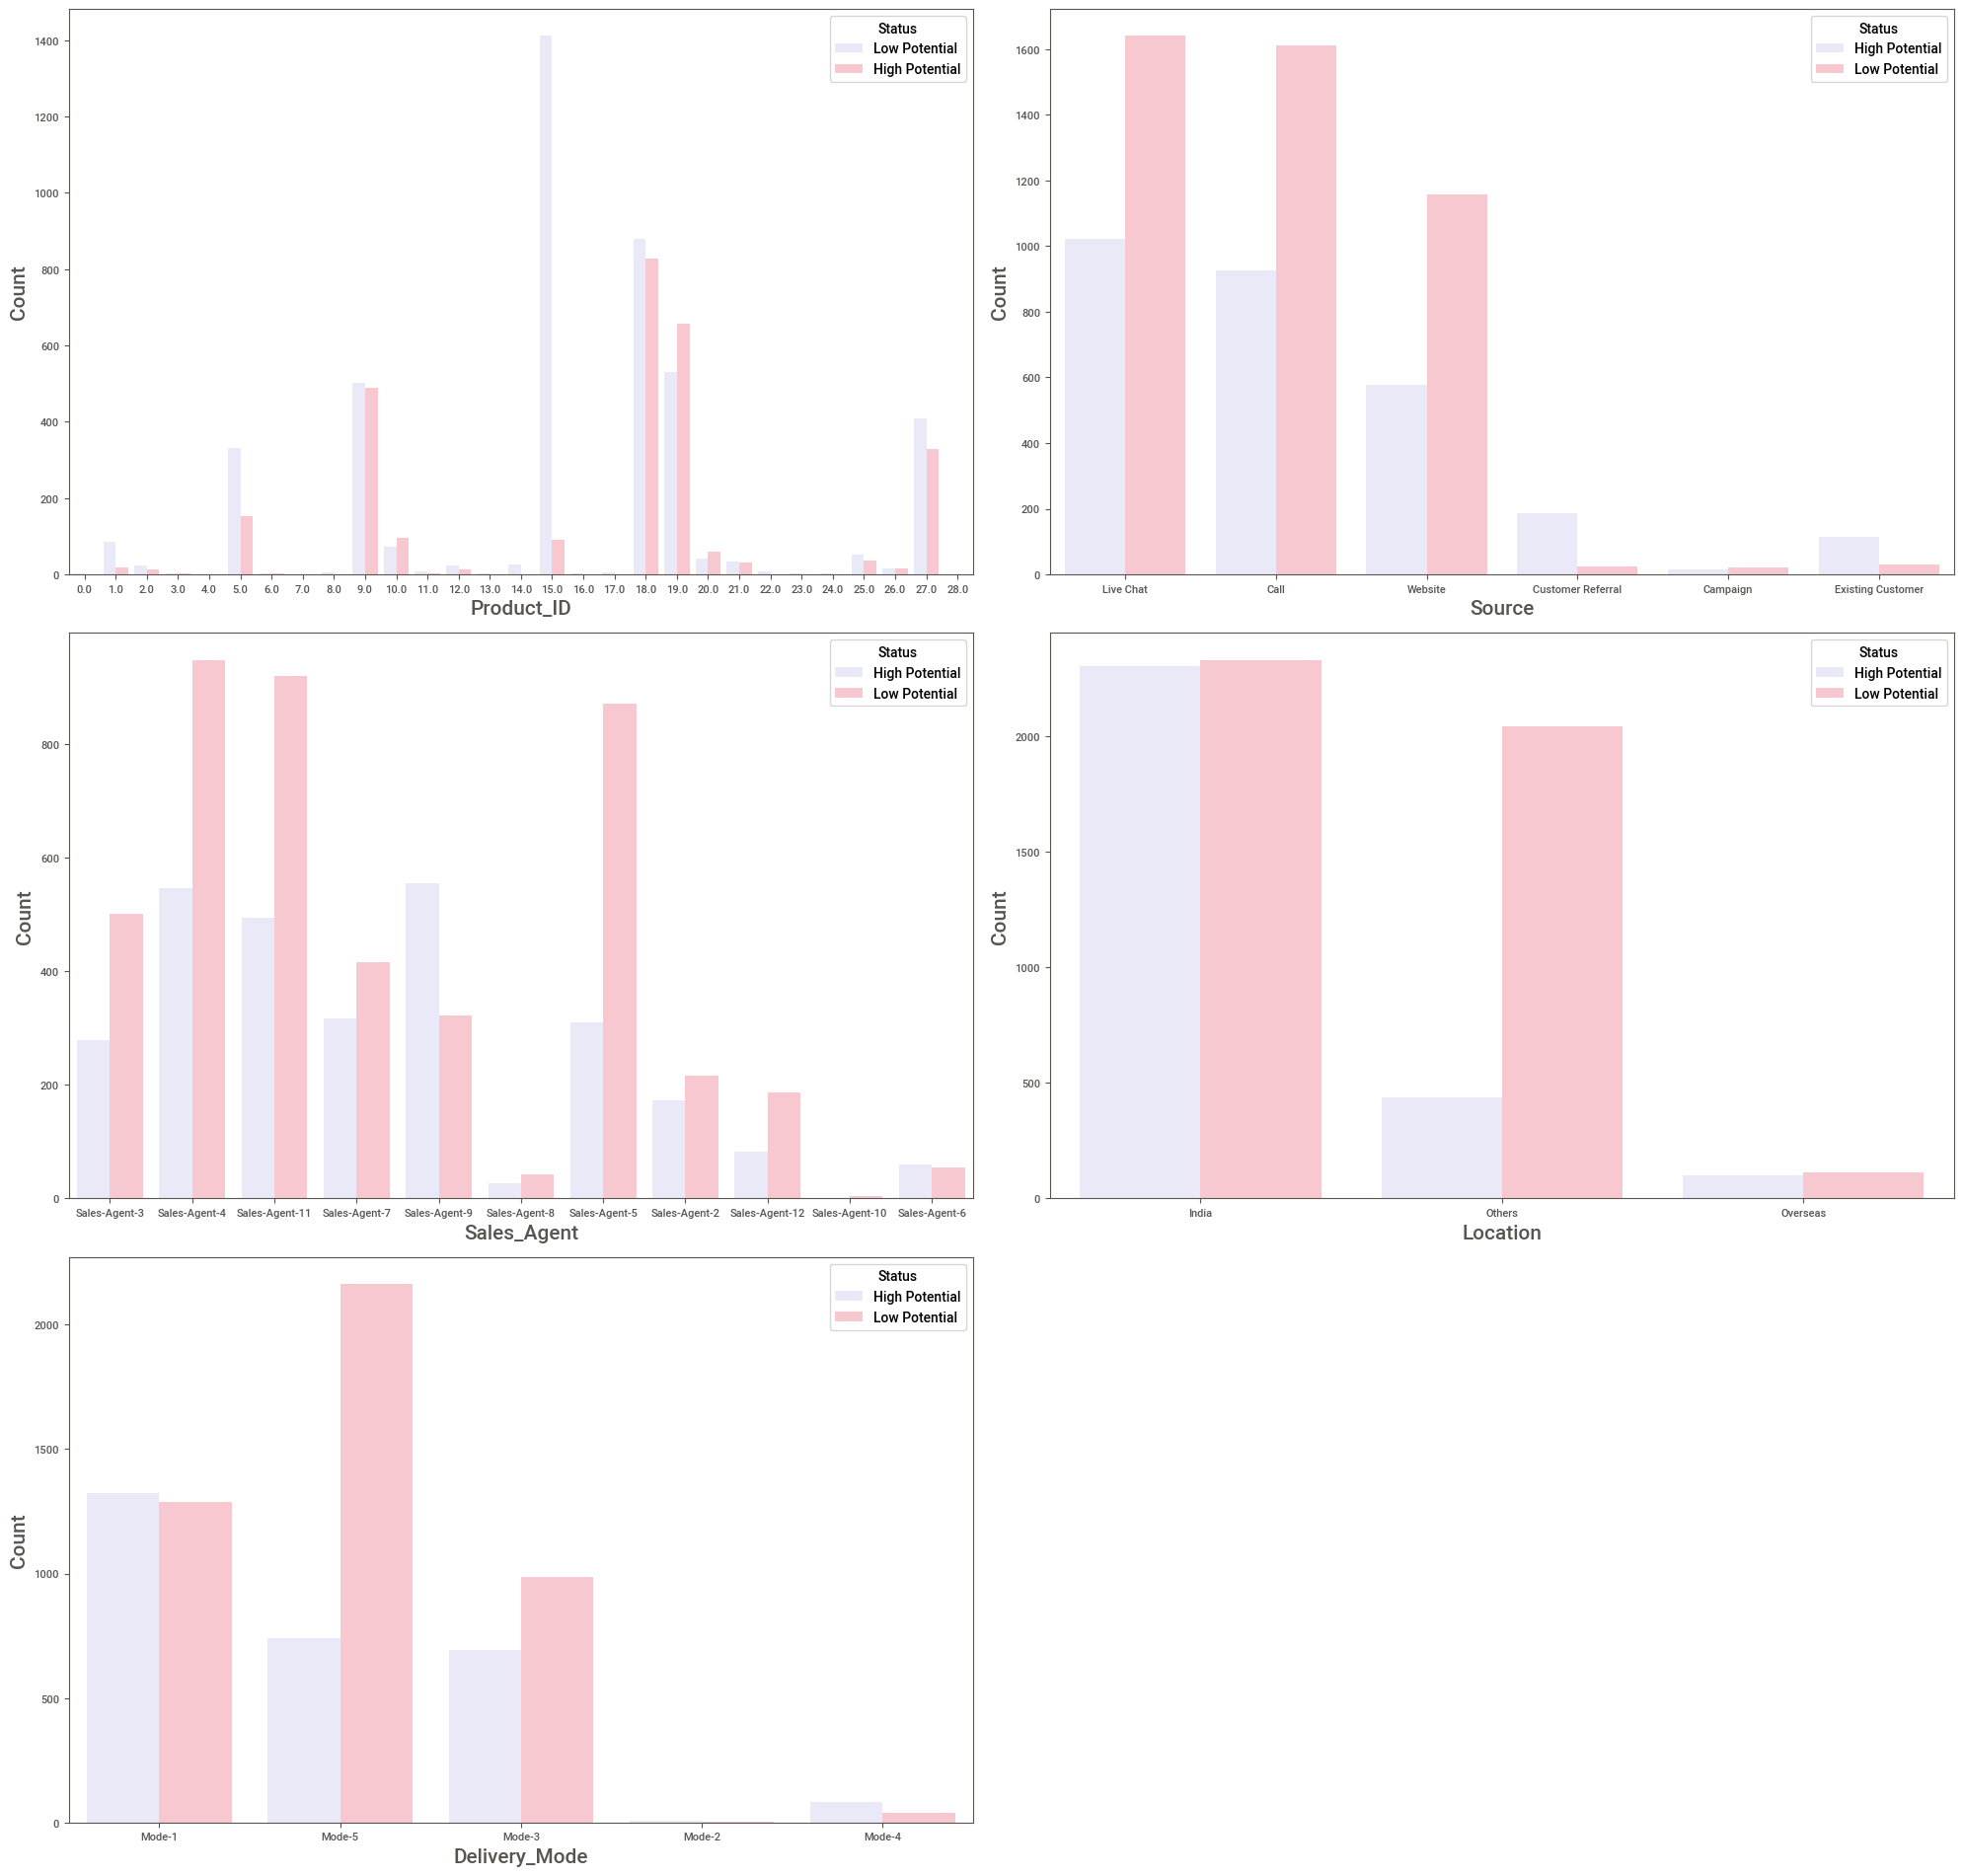

In [62]:
# Defining 'Status' as the Dependent variable

dependent_variable = data_new['Status']

# Defining all other columns as Independent Variables

independent_variables = data_new.drop('Status', axis = 1)

palette = sns.color_palette(['lavender', 'pink'])

plt.figure(figsize=(20, 25), facecolor='white')
plot_number = 1

for column in independent_variables.columns:
    if plot_number <= len(independent_variables.columns):
        plt.subplot(4, 2, plot_number)
        sns.countplot(x = column, hue = 'Status', data = data_new, palette = palette)
        plt.xlabel(column, fontsize = 15)
        plt.ylabel('Count', fontsize = 15)
        plot_number += 1

plt.tight_layout()
plt.show()

**Observation:**
1. Most of the **More Sold Product** is in "Low Potentail Category" of Status and has the **Low Potential Lead**.

2. **Live Chat**, **Call**  and **Website** have the highest no. of **High Potential Lead** but at the same time maximum number of Low Potential Lead too.

3. **Sales Agent-9** has most number of **High Potential Lead** followed by Sales_Agent 4, 5 and 11 having more leads but most of them are of **Low Potential**.

4. Most of the **Low Potential Lead** are from **Other Locations** category.

5. **Delivery Mode-2** has only **High Potential Lead** with almost NO Low Potential Lead and **Delivery Mode-4** also has **High Potential Lead** with little Low Potential Lead.

# Data Preprocessing

In [65]:
data_new

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
18,9.0,Live Chat,Sales-Agent-3,India,Mode-1,High Potential
19,19.0,Call,Sales-Agent-4,Others,Mode-5,High Potential
24,18.0,Website,Sales-Agent-11,India,Mode-1,High Potential
25,15.0,Website,Sales-Agent-7,India,Mode-1,Low Potential
26,18.0,Call,Sales-Agent-7,India,Mode-1,High Potential
...,...,...,...,...,...,...
7417,9.0,Call,Sales-Agent-6,India,Mode-4,Low Potential
7418,15.0,Call,Sales-Agent-12,Others,Mode-5,Low Potential
7419,5.0,Live Chat,Sales-Agent-11,India,Mode-1,Low Potential
7420,21.0,Existing Customer,Sales-Agent-4,Others,Mode-1,Low Potential


### Finding Missing Values

In [67]:
missing_values=data_new.isnull().sum()
missing_values

Product_ID       0
Source           0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64

### Finding And Handling Duplicates 

In [69]:
data_new.duplicated().sum()

5425

In [70]:
data_new[data_new.duplicated()]

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
48,15.0,Call,Sales-Agent-7,Others,Mode-5,Low Potential
53,15.0,Call,Sales-Agent-7,Others,Mode-5,Low Potential
70,18.0,Website,Sales-Agent-11,India,Mode-1,High Potential
75,15.0,Call,Sales-Agent-7,Others,Mode-5,Low Potential
76,15.0,Call,Sales-Agent-11,Others,Mode-5,Low Potential
...,...,...,...,...,...,...
7416,19.0,Live Chat,Sales-Agent-9,Others,Mode-3,Low Potential
7417,9.0,Call,Sales-Agent-6,India,Mode-4,Low Potential
7418,15.0,Call,Sales-Agent-12,Others,Mode-5,Low Potential
7419,5.0,Live Chat,Sales-Agent-11,India,Mode-1,Low Potential


In [71]:
data_new=data_new.drop_duplicates()
data_new

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
18,9.0,Live Chat,Sales-Agent-3,India,Mode-1,High Potential
19,19.0,Call,Sales-Agent-4,Others,Mode-5,High Potential
24,18.0,Website,Sales-Agent-11,India,Mode-1,High Potential
25,15.0,Website,Sales-Agent-7,India,Mode-1,Low Potential
26,18.0,Call,Sales-Agent-7,India,Mode-1,High Potential
...,...,...,...,...,...,...
7400,20.0,Call,Sales-Agent-11,India,Mode-1,High Potential
7402,9.0,Live Chat,Sales-Agent-11,Others,Mode-1,High Potential
7408,10.0,Call,Sales-Agent-9,India,Mode-4,High Potential
7409,19.0,Call,Sales-Agent-2,India,Mode-4,High Potential


In [72]:
data_new.duplicated().sum()

0

### Encoding

In [74]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [75]:
categorical_columns=['Source','Sales_Agent','Location','Delivery_Mode']
for column in categorical_columns:
    data_new[column]=le.fit_transform(data_new[column])

In [76]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(categories=[['Low Potential', 'High Potential']])
data_new['Status_encoded'] = encoder.fit_transform(data_new[['Status']])

In [77]:
data_new

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Status_encoded
18,9.0,4,4,0,0,High Potential,1.0
19,19.0,0,5,1,4,High Potential,1.0
24,18.0,5,1,0,0,High Potential,1.0
25,15.0,5,8,0,0,Low Potential,0.0
26,18.0,0,8,0,0,High Potential,1.0
...,...,...,...,...,...,...,...
7400,20.0,0,1,0,0,High Potential,1.0
7402,9.0,4,1,1,0,High Potential,1.0
7408,10.0,0,10,0,3,High Potential,1.0
7409,19.0,0,3,0,3,High Potential,1.0


In [78]:
data_new['Status_encoded']=data_new['Status_encoded'].astype(int)
data_new.drop('Status',axis=1,inplace=True)

In [79]:
data_new

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status_encoded
18,9.0,4,4,0,0,1
19,19.0,0,5,1,4,1
24,18.0,5,1,0,0,1
25,15.0,5,8,0,0,0
26,18.0,0,8,0,0,1
...,...,...,...,...,...,...
7400,20.0,0,1,0,0,1
7402,9.0,4,1,1,0,1
7408,10.0,0,10,0,3,1
7409,19.0,0,3,0,3,1


### Finding And Handling Outliers ###

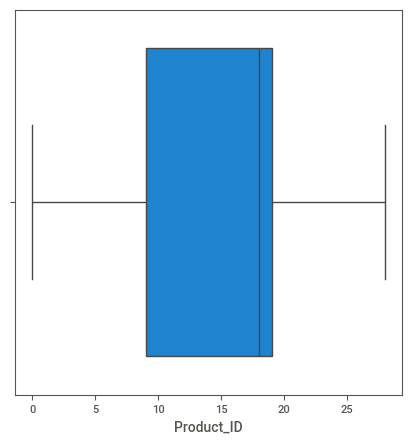

In [81]:
plt.figure(figsize=(5,5))
sns.boxplot(x=data_new.Product_ID)
plt.show()

#### No outliers are found

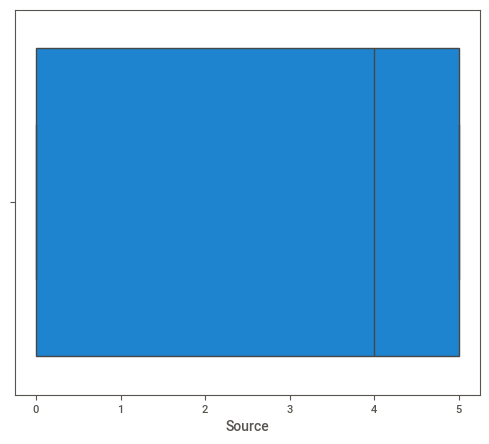

In [83]:
plt.figure(figsize=(6,5))
sns.boxplot(x=data_new.Source)
plt.show()

#### No outliers are found

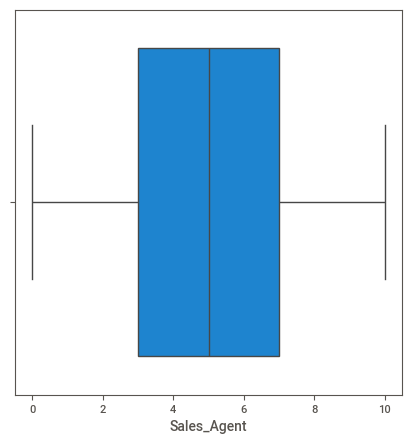

In [85]:
plt.figure(figsize=(5,5))
sns.boxplot(x=data_new.Sales_Agent)
plt.show()

#### No outliers are found

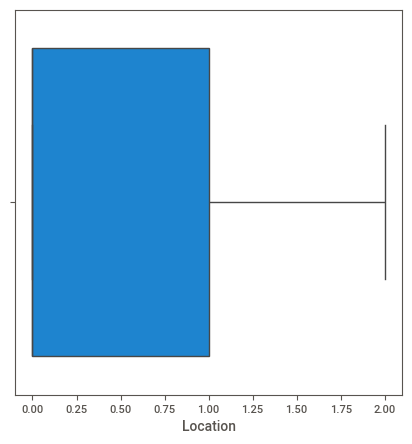

In [87]:
plt.figure(figsize=(5,5))
sns.boxplot(x=data_new.Location)
plt.show()

#### No outliers are found

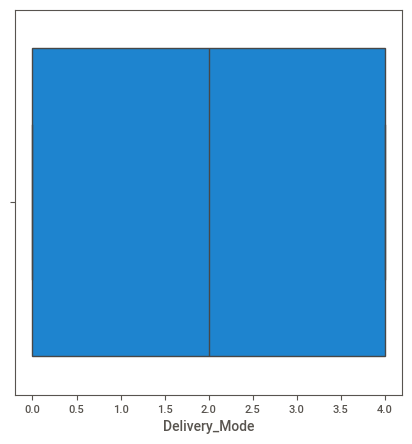

In [89]:
plt.figure(figsize=(5,5))
sns.boxplot(x=data_new.Delivery_Mode)
plt.show()

#### No outliers are found

### Balancing the Data using SMOTE

In [92]:
x=data_new.iloc[:,:-1]
y=data_new.Status_encoded

In [93]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [94]:
smote=SMOTE()

In [95]:
x_train_smote,y_train_smote=smote.fit_resample(x_train,y_train)

In [96]:
len(y_train)

1522

In [97]:
len(y_train_smote)

1654

In [98]:
from collections import Counter

In [99]:
print('Actual classes',Counter(y_train))
print('smote clases',Counter(y_train_smote))

Actual classes Counter({0: 827, 1: 695})
smote clases Counter({0: 827, 1: 827})


# Feature Selection

### FINDING THE CORRELATION

In [102]:
data_new

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status_encoded
18,9.0,4,4,0,0,1
19,19.0,0,5,1,4,1
24,18.0,5,1,0,0,1
25,15.0,5,8,0,0,0
26,18.0,0,8,0,0,1
...,...,...,...,...,...,...
7400,20.0,0,1,0,0,1
7402,9.0,4,1,1,0,1
7408,10.0,0,10,0,3,1
7409,19.0,0,3,0,3,1


Correlation Matrix:
                 Product_ID    Source  Sales_Agent  Location  Delivery_Mode  \
Product_ID        1.000000 -0.003899    -0.021099  0.012414       0.002380   
Source           -0.003899  1.000000     0.012483  0.122622      -0.059867   
Sales_Agent      -0.021099  0.012483     1.000000 -0.022757      -0.102458   
Location          0.012414  0.122622    -0.022757  1.000000       0.132660   
Delivery_Mode     0.002380 -0.059867    -0.102458  0.132660       1.000000   
Status_encoded    0.071148 -0.082107     0.053666 -0.067175      -0.021353   

                Status_encoded  
Product_ID            0.071148  
Source               -0.082107  
Sales_Agent           0.053666  
Location             -0.067175  
Delivery_Mode        -0.021353  
Status_encoded        1.000000  


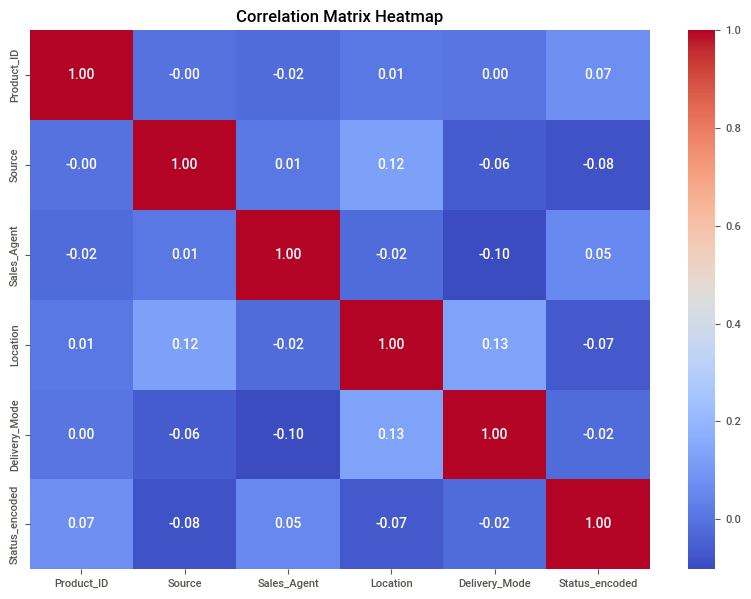

In [103]:
# correlation matrix
correlation_matrix = data_new.corr()

# correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

# Visualize with a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

## Insights 

##### **1.Product _ID & Status_encoded** -> (+0.074) -> very weak positive -> A slightly trend that certain products may have a higher conversion or closure rate,but the relationship is very weak.
##### **2. Source & Status_encoded** -> (-0.08) -> Very Weak Negative -> Leads from some sources (e.g., Call or Website) may slightly underperform in terms of conversion, but the effect is minimal.
##### **3.Sales_Agent & Status_encoded** -> (+0.068) -> Very Weak Positive -> Sales_Agent & Status -> There is a minimal positive link between agent identity and conversion, suggesting agent performance might have a small impact.
##### **4.Location & Status_encoded** -> (-0.073) -> Very Weak Negative -> Some locations might be slightly less likely to convert, but no strong conclusion can be drawn.
##### **5.Delivery_Mode & Status_encoded** -> (-0.023) -> Negligible ->The mode of delivery does not meaningfully impact the status of the lead.
### Notable Feature Relationships:
##### **6.Location & Source** -> (+0.123) -> 	Certain locations are more commonly associated with specific sources, indicating possible regional marketing effectiveness.
##### **7.Location & Delivery_Mode** -> (+0.133) -> Delivery preferences slightly vary across locations, possibly due to logistical feasibility or customer preferences.
##### **8.Sales_Agent & Delivery_Mode** -> (-0.103) -> Certain agents may be assigned to leads with specific delivery modes, possibly due to internal allocation strategies.

##### All correlations with Status are weak or negligible, indicating that no single feature shows a strong linear relationship with lead outcome. 
##### However, minor influences from Product_ID, Sales_Agent, and Source are observed.

##### Some inter-feature dependencies (like Location ↔ Source and Location ↔ Delivery_Mode) are slightly stronger, suggesting regional trends in source usage or delivery preferences.

# Model Creation 

### Logistic Regression 

In [108]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train_smote,y_train_smote)

LogisticRegression()

In [109]:
y_predict=LR.predict(x_test)
y_predict

array([1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,

In [110]:
y_test

5854    0
185     0
1163    1
1084    1
6218    1
       ..
3728    0
1245    1
7257    1
239     0
2649    1
Name: Status_encoded, Length: 381, dtype: int32

In [111]:
from sklearn.metrics import classification_report,recall_score,precision_score,accuracy_score,f1_score,confusion_matrix

In [112]:
confusion_matrix=confusion_matrix(y_test,y_predict)
confusion_matrix

array([[124,  93],
       [ 69,  95]], dtype=int64)

In [113]:
recall=recall_score(y_test,y_predict)
recall

0.5792682926829268

In [114]:
precision=precision_score(y_test,y_predict)
precision

0.5053191489361702

In [115]:
f1_score=f1_score(y_test,y_predict)
f1_score

0.5397727272727273

In [116]:
accuracy=accuracy_score(y_test,y_predict)
accuracy

0.5748031496062992

In [117]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.64      0.57      0.60       217
           1       0.51      0.58      0.54       164

    accuracy                           0.57       381
   macro avg       0.57      0.58      0.57       381
weighted avg       0.58      0.57      0.58       381



### K Nearest Neighbors (KNN)

In [119]:
from sklearn.neighbors import KNeighborsClassifier

In [120]:
error_rate=[]
for i in range (1,11):
    KNN=KNeighborsClassifier(n_neighbors=i)
    KNN.fit(x_train_smote,y_train_smote)
    y_pred_i=KNN.predict(x_test)
    error_rate.append(np.mean(y_pred_i!=y_test))

In [121]:
error_rate

[0.6404199475065617,
 0.5406824146981627,
 0.5669291338582677,
 0.5328083989501312,
 0.5354330708661418,
 0.5013123359580053,
 0.5065616797900262,
 0.49606299212598426,
 0.46981627296587924,
 0.49606299212598426]

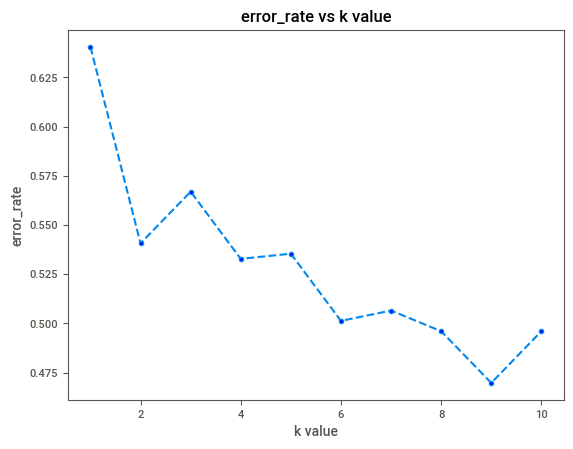

In [122]:
# Let's plot k value and error rate
plt.plot(range(1,11),error_rate,linestyle='dashed',marker='o',markerfacecolor='blue')
plt.title('error_rate vs k value')
plt.xlabel('k value')
plt.ylabel('error_rate')
plt.show()

In [123]:
# Let's fit the data into KNN model
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train_smote,y_train_smote)

KNeighborsClassifier(n_neighbors=8)

In [124]:
y_predict=knn.predict(x_test)
y_predict

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [125]:
from sklearn.metrics import classification_report,recall_score,precision_score,accuracy_score,f1_score,confusion_matrix

In [126]:
confusion_matrix=confusion_matrix(y_test,y_predict)
confusion_matrix

array([[142,  75],
       [114,  50]], dtype=int64)

In [127]:
accuracy=accuracy_score(y_test,y_predict)
accuracy

0.5039370078740157

In [128]:
recall=recall_score(y_test,y_predict)
recall

0.3048780487804878

In [129]:
precision=precision_score(y_test,y_predict)
precision

0.4

In [130]:
f1_score=f1_score(y_test,y_predict)
f1_score

0.3460207612456747

In [131]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.55      0.65      0.60       217
           1       0.40      0.30      0.35       164

    accuracy                           0.50       381
   macro avg       0.48      0.48      0.47       381
weighted avg       0.49      0.50      0.49       381



### Supprt Vector Machine (SVM)

In [133]:
from sklearn.svm import SVC
svclassifier=SVC()
svclassifier.fit(x_train_smote,y_train_smote)

SVC()

In [134]:
y_predict=svclassifier.predict(x_test)
y_predict

array([1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,

In [135]:
from sklearn.metrics import classification_report,recall_score,precision_score,f1_score,confusion_matrix

In [136]:
print(confusion_matrix(y_test,y_predict))

[[150  67]
 [ 97  67]]


In [137]:
accuracy=accuracy_score(y_test,y_predict)
accuracy

0.5695538057742782

In [138]:
recall=recall_score(y_test,y_predict)
recall

0.40853658536585363

In [139]:
precision=precision_score(y_test,y_predict)
precision

0.5

In [140]:
f1_score=f1_score(y_test,y_predict)
f1_score

0.44966442953020136

In [141]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.61      0.69      0.65       217
           1       0.50      0.41      0.45       164

    accuracy                           0.57       381
   macro avg       0.55      0.55      0.55       381
weighted avg       0.56      0.57      0.56       381



#### Hyperparameter Tuning

In [143]:
from sklearn.model_selection import GridSearchCV
from itertools import product

In [144]:
param_grid={ 'C':[0.1,1,10,100],
            'kernel':['rbf'],
            'gamma':['scale','auto']
           }

In [145]:
model=SVC()
grid=GridSearchCV(model,param_grid=param_grid,scoring='accuracy',cv=3,refit=True)
grid.fit(x_train_smote,y_train_smote)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf']},
             scoring='accuracy')

In [146]:
print(grid.best_params_)

{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}


In [147]:
y_predict=grid.predict(x_test)
y_predict

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [148]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix,classification_report

In [149]:
confusion_matrix=confusion_matrix(y_test,y_predict)
confusion_matrix

array([[127,  90],
       [ 65,  99]], dtype=int64)

In [150]:
recall=recall_score(y_test,y_predict)
recall

0.6036585365853658

In [151]:
precision=precision_score(y_test,y_predict)
precision

0.5238095238095238

In [152]:
f1_score=f1_score(y_test,y_predict)
f1_score

0.5609065155807366

In [153]:
accuracy=accuracy_score(y_test,y_predict)
accuracy

0.5931758530183727

In [154]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.66      0.59      0.62       217
           1       0.52      0.60      0.56       164

    accuracy                           0.59       381
   macro avg       0.59      0.59      0.59       381
weighted avg       0.60      0.59      0.60       381



## Decision Tree 

In [156]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(x_train_smote,y_train_smote)

DecisionTreeClassifier()

In [157]:
y_predict=DT.predict(x_test)
y_predict

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,

In [158]:
from sklearn.metrics import classification_report,recall_score,precision_score,f1_score,confusion_matrix

In [159]:
print(confusion_matrix(y_test,y_predict))

[[ 99 118]
 [132  32]]


In [160]:
accuracy=accuracy_score(y_test,y_predict)
accuracy

0.3438320209973753

In [161]:
f1_score=f1_score(y_test,y_predict)
f1_score

0.20382165605095542

In [162]:
recall=recall_score(y_test,y_predict)
recall

0.1951219512195122

In [163]:
precision=precision_score(y_test,y_predict)
precision

0.21333333333333335

In [164]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.43      0.46      0.44       217
           1       0.21      0.20      0.20       164

    accuracy                           0.34       381
   macro avg       0.32      0.33      0.32       381
weighted avg       0.34      0.34      0.34       381



#### Hyperparameter Tuning

In [166]:
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 30))), 
    "min_samples_split":[2, 3, 4,5], 
    "min_samples_leaf":list(range(1, 10)), 
}


In [167]:
clf=DecisionTreeClassifier(random_state=42)
grid=GridSearchCV(clf,params,scoring='accuracy',n_jobs=-1,cv=3)
grid.fit(x_train_smote,y_train_smote)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3, 4, 5],
                         'splitter': ('best', 'random')},
             scoring='accuracy')

In [168]:
print(grid.best_params_)

{'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


In [169]:
y_predict=grid.predict(x_test)
y_predict

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,

In [170]:
from sklearn.metrics import confusion_matrix,recall_score,precision_score,f1_score,accuracy_score,classification_report

In [171]:
print(confusion_matrix(y_test,y_predict))

[[145  72]
 [ 95  69]]


In [172]:
recall=recall_score(y_test,y_predict)
recall

0.42073170731707316

In [173]:
precision=precision_score(y_test,y_predict)
precision

0.48936170212765956

In [174]:
f1_score=f1_score(y_test,y_predict)
f1_score

0.4524590163934426

In [175]:
accuracy=accuracy_score(y_test,y_predict)
accuracy

0.5616797900262467

In [176]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.60      0.67      0.63       217
           1       0.49      0.42      0.45       164

    accuracy                           0.56       381
   macro avg       0.55      0.54      0.54       381
weighted avg       0.55      0.56      0.56       381



### Random Forest 

In [178]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier()
RFC.fit(x_train_smote,y_train_smote)

RandomForestClassifier()

In [179]:
y_predict=RFC.predict(x_test)
y_predict

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,

In [180]:
from sklearn.metrics import classification_report,recall_score,precision_score,f1_score,confusion_matrix

In [181]:
print(confusion_matrix(y_test,y_predict))

[[ 97 120]
 [114  50]]


In [182]:
accuracy=accuracy_score(y_test,y_predict)
accuracy

0.3858267716535433

In [183]:
f1_score=f1_score(y_test,y_predict)
f1_score

0.2994011976047904

In [184]:
precision=precision_score(y_test,y_predict)
precision

0.29411764705882354

In [185]:
recall=recall_score(y_test,y_predict)
recall

0.3048780487804878

In [186]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.46      0.45      0.45       217
           1       0.29      0.30      0.30       164

    accuracy                           0.39       381
   macro avg       0.38      0.38      0.38       381
weighted avg       0.39      0.39      0.39       381



#### Hyperparameter Tuning

In [188]:
from sklearn.model_selection import RandomizedSearchCV

In [189]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=2000, num=10)]
max_features = ['auto', 'sqrt']  
max_depth = [int(x) for x in np.linspace(10, 110, num=10)] 
max_depth.append(None)
min_samples_split = [2, 5, 15]
min_samples_leaf = [1, 2, 4]

In [190]:
random = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [191]:
rf_clf = RandomForestClassifier(random_state=42) 
rf = RandomizedSearchCV(estimator=rf_clf, scoring='f1',param_distributions=random, n_iter=100, cv=3, 
                               verbose=3, random_state=42, n_jobs=-1)
rf.fit(x_train_smote, y_train_smote)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 21, 32, 43, 54, 65,
                                                      76, 87, 98, 110, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 15],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000]},
                   random_state=42, scoring='f1', verbose=3)

In [192]:
print(rf.best_params_)

{'n_estimators': 944, 'min_samples_split': 15, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 21}


In [193]:
y_predict=rf.predict(x_test)
y_predict

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,

In [194]:
from sklearn.metrics import confusion_matrix,recall_score,precision_score,f1_score,accuracy_score,classification_report

In [195]:
print(confusion_matrix(y_test,y_predict))

[[118  99]
 [ 94  70]]


In [196]:
accuracy=accuracy_score(y_test,y_predict)
accuracy

0.49343832020997375

In [197]:
recall=recall_score(y_test,y_predict)
recall

0.4268292682926829

In [198]:
precision=precision_score(y_test,y_predict)
precision

0.41420118343195267

In [199]:
f1_score=f1_score(y_test,y_predict)
f1_score

0.42042042042042044

In [200]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.56      0.54      0.55       217
           1       0.41      0.43      0.42       164

    accuracy                           0.49       381
   macro avg       0.49      0.49      0.49       381
weighted avg       0.50      0.49      0.49       381



### Gradient Boosting

In [202]:
from sklearn.ensemble import GradientBoostingClassifier
GBC=GradientBoostingClassifier()
GBC.fit(x_train_smote,y_train_smote)

GradientBoostingClassifier()

In [203]:
y_predict=GBC.predict(x_test)
y_predict

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,

In [204]:
from sklearn.metrics import confusion_matrix,recall_score,precision_score,f1_score,accuracy_score,classification_report

In [205]:
print(confusion_matrix(y_test,y_predict))

[[123  94]
 [ 66  98]]


In [206]:
recall=recall_score(y_test,y_predict)
recall

0.5975609756097561

In [207]:
precision=precision_score(y_test,y_predict)
precision

0.5104166666666666

In [208]:
f1_score=f1_score(y_test,y_predict)
f1_score

0.550561797752809

In [209]:
accuracy=accuracy_score(y_test,y_predict)
accuracy

0.5800524934383202

In [210]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.65      0.57      0.61       217
           1       0.51      0.60      0.55       164

    accuracy                           0.58       381
   macro avg       0.58      0.58      0.58       381
weighted avg       0.59      0.58      0.58       381



### Hyperparameter Tuning

In [212]:
parameter = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0],
    'max_features': ['sqrt', 'log2']
}

In [213]:
gb = GradientBoostingClassifier(random_state=42)
random = RandomizedSearchCV(estimator=gb,
                                   param_distributions=parameter,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=5,
                                   random_state=42,
                                   n_jobs=-1,
                                   verbose=2)

random.fit(x_train_smote, y_train_smote)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 4, 5],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.8, 1.0]},
                   random_state=42, scoring='accuracy', verbose=2)

In [214]:
print(random.best_params_)

{'subsample': 0.8, 'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 3, 'learning_rate': 0.01}


In [215]:
y_predict=random.predict(x_test)
y_predict

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,

In [216]:
from sklearn.metrics import confusion_matrix,recall_score,precision_score,accuracy_score,f1_score,classification_report

In [217]:
print(confusion_matrix(y_test,y_predict))

[[128  89]
 [ 68  96]]


In [218]:
recall=recall_score(y_test,y_predict)
recall

0.5853658536585366

In [219]:
precision=precision_score(y_test,y_predict)
precision

0.518918918918919

In [220]:
f1_score=f1_score(y_test,y_predict)
f1_score

0.5501432664756447

In [221]:
accuracy=accuracy_score(y_test,y_predict)
accuracy

0.5879265091863517

In [222]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.65      0.59      0.62       217
           1       0.52      0.59      0.55       164

    accuracy                           0.59       381
   macro avg       0.59      0.59      0.58       381
weighted avg       0.60      0.59      0.59       381



### XG Boost

In [224]:
!pip install xgboost

In [225]:
from xgboost import XGBClassifier
XGB=XGBClassifier()
XGB.fit(x_train_smote,y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [226]:
y_predict=XGB.predict(x_test)
y_predict

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,

In [227]:
from sklearn.metrics import confusion_matrix,recall_score,precision_score,f1_score,accuracy_score,classification_report

In [228]:
print(confusion_matrix(y_test,y_predict))

[[ 97 120]
 [107  57]]


In [229]:
recall=recall_score(y_test,y_predict)
recall

0.3475609756097561

In [230]:
precision=precision_score(y_test,y_predict)
precision

0.3220338983050847

In [231]:
f1_score=f1_score(y_test,y_predict)
f1_score

0.3343108504398827

In [232]:
accuracy=accuracy_score(y_test,y_predict)
accuracy

0.4041994750656168

In [233]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.48      0.45      0.46       217
           1       0.32      0.35      0.33       164

    accuracy                           0.40       381
   macro avg       0.40      0.40      0.40       381
weighted avg       0.41      0.40      0.41       381



#### Hyperparameter Tuning

In [235]:
parameter = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [1, 1.5]
}

In [236]:
xg=XGBClassifier(random_state=42)
random_= RandomizedSearchCV(
    estimator=xg,
    param_distributions=parameter,
    n_iter=50,
    scoring='accuracy',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)
random.fit(x_train_smote,y_train_smote)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 4, 5],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.8, 1.0]},
                   random_state=42, scoring='accuracy', verbose=2)

In [237]:
print(random.best_params_)

{'subsample': 0.8, 'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 3, 'learning_rate': 0.01}


In [238]:
y_predict=random.predict(x_test)
y_predict

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,

In [239]:
from sklearn.metrics import confusion_matrix,recall_score,precision_score,f1_score,accuracy_score,classification_report

In [240]:
print(confusion_matrix(y_test,y_predict))

[[128  89]
 [ 68  96]]


In [241]:
recall=recall_score(y_test,y_predict)
recall

0.5853658536585366

In [242]:
precision=precision_score(y_test,y_predict)
precision

0.518918918918919

In [243]:
f1_score=f1_score(y_test,y_predict)
f1_score

0.5501432664756447

In [244]:
accuracy=accuracy_score(y_test,y_predict)
accuracy

0.5879265091863517

In [245]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.65      0.59      0.62       217
           1       0.52      0.59      0.55       164

    accuracy                           0.59       381
   macro avg       0.59      0.59      0.58       381
weighted avg       0.60      0.59      0.59       381



### Artificial Neural Network (ANN)

In [247]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(50,2),
                      learning_rate='constant',
                      max_iter=1000,
                      random_state=45)

model.fit(x_train_smote,y_train_smote)

MLPClassifier(hidden_layer_sizes=(50, 2), max_iter=1000, random_state=45)

In [248]:
y_predict=model.predict(x_test)
y_predict

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,

In [249]:
from sklearn.metrics import confusion_matrix,recall_score,precision_score,f1_score,accuracy_score,classification_report

In [250]:
print(confusion_matrix(y_test,y_predict))

[[136  81]
 [ 80  84]]


In [251]:
recall=recall_score(y_test,y_predict)
recall

0.5121951219512195

In [252]:
precision=precision_score(y_test,y_predict)
precision

0.509090909090909

In [253]:
f1_score=f1_score(y_test,y_predict)
f1_score

0.5106382978723404

In [254]:
accuracy=accuracy_score(y_test,y_predict)
accuracy

0.5774278215223098

In [255]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.63      0.63      0.63       217
           1       0.51      0.51      0.51       164

    accuracy                           0.58       381
   macro avg       0.57      0.57      0.57       381
weighted avg       0.58      0.58      0.58       381



# Model Evaluation Report
* Support Vector Machine, Gradient Boosting and XG Boost models performs well with the data.
* Artificial Neural Network, Logistic Regression and Decision Tree models' performance is average.
* KNN and Random Forest models perform poorly with the data.